In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
#!kaggle datasets download -d omkargurav/face-mask-dataset
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:01<00:00, 80.0MB/s]
100% 163M/163M [00:02<00:00, 85.3MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
#print(with_mask_files[-5:])

['with_mask_2658.jpg', 'with_mask_3696.jpg', 'with_mask_2910.jpg', 'with_mask_1772.jpg', 'with_mask_1415.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
#print(without_mask_files[-5:])

['without_mask_2910.jpg', 'without_mask_2017.jpg', 'without_mask_2019.jpg', 'without_mask_610.jpg', 'without_mask_3045.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

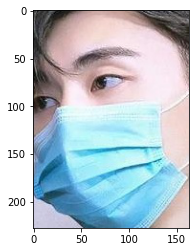

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

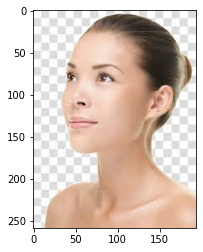

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 50,  49,  55],
        [ 48,  47,  53],
        [ 44,  43,  49],
        ...,
        [ 35,  35,  35],
        [ 42,  42,  42],
        [ 35,  35,  35]],

       [[ 43,  42,  48],
        [ 44,  43,  49],
        [ 44,  43,  49],
        ...,
        [ 36,  36,  36],
        [ 39,  39,  39],
        [ 38,  38,  38]],

       [[ 41,  40,  46],
        [ 42,  41,  47],
        [ 42,  41,  47],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 36,  36,  36]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[218, 218, 228],
        [218, 218, 228],
        [218, 218, 228],
        ...,
        [216, 219, 228],
        [216, 219, 228],
        [216, 219, 228]],

       [[218, 218, 228],
        [218, 218, 228],
        [218, 218, 228],
        ...,
        [216, 219, 228],
        [216, 219, 228],
        [216, 219, 228]],

       [[218, 218, 228],
        [218, 218, 228],
        [218, 218, 228],
        ...,
        [216, 219, 228],
        [216, 219, 228],
        [216, 219, 228]],

       ...,

       [[202, 205, 214],
        [202, 205, 214],
        [202, 205, 214],
        ...,
        [206, 209, 218],
        [205, 208, 217],
        [205, 208, 217]],

       [[202, 205, 214],
        [202, 205, 214],
        [202, 205, 214],
        ...,
        [205, 208, 217],
        [204, 207, 216],
        [203, 206, 215]],

       [[202, 205, 214],
        [202, 205, 214],
        [202, 205, 214],
        ...,
        [204, 207, 216],
        [203, 206, 215],
        [202, 205, 214]]

In [ ]:
X_train_scaled[0]

array([[[0.85490196, 0.85490196, 0.89411765],
        [0.85490196, 0.85490196, 0.89411765],
        [0.85490196, 0.85490196, 0.89411765],
        ...,
        [0.84705882, 0.85882353, 0.89411765],
        [0.84705882, 0.85882353, 0.89411765],
        [0.84705882, 0.85882353, 0.89411765]],

       [[0.85490196, 0.85490196, 0.89411765],
        [0.85490196, 0.85490196, 0.89411765],
        [0.85490196, 0.85490196, 0.89411765],
        ...,
        [0.84705882, 0.85882353, 0.89411765],
        [0.84705882, 0.85882353, 0.89411765],
        [0.84705882, 0.85882353, 0.89411765]],

       [[0.85490196, 0.85490196, 0.89411765],
        [0.85490196, 0.85490196, 0.89411765],
        [0.85490196, 0.85490196, 0.89411765],
        ...,
        [0.84705882, 0.85882353, 0.89411765],
        [0.84705882, 0.85882353, 0.89411765],
        [0.84705882, 0.85882353, 0.89411765]],

       ...,

       [[0.79215686, 0.80392157, 0.83921569],
        [0.79215686, 0.80392157, 0.83921569],
        [0.79215686, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:


model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(units =1, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=30)

Epoch 1/30
170/170 [==============================] - 5s 19ms/step - loss: 0.4464 - accuracy: 0.8065 - val_loss: 0.2574 - val_accuracy: 0.8909
Epoch 2/30
170/170 [==============================] - 3s 18ms/step - loss: 0.2660 - accuracy: 0.8953 - val_loss: 0.1991 - val_accuracy: 0.9140
Epoch 3/30
170/170 [==============================] - 3s 18ms/step - loss: 0.2324 - accuracy: 0.9082 - val_loss: 0.1906 - val_accuracy: 0.9157
Epoch 4/30
170/170 [==============================] - 3s 17ms/step - loss: 0.1740 - accuracy: 0.9292 - val_loss: 0.1655 - val_accuracy: 0.9223
Epoch 5/30
170/170 [==============================] - 3s 17ms/step - loss: 0.1575 - accuracy: 0.9375 - val_loss: 0.1756 - val_accuracy: 0.9289
Epoch 6/30
170/170 [==============================] - 3s 18ms/step - loss: 0.1319 - accuracy: 0.9500 - val_loss: 0.1882 - val_accuracy: 0.9339
Epoch 7/30
170/170 [==============================] - 3s 19ms/step - loss: 0.1039 - accuracy: 0.9621 - val_loss: 0.1865 - val_accuracy: 0.9207

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.3186 - accuracy: 0.9351
Test Accuracy = 0.9351422786712646


In [ ]:
# we can even plot the accuracy and the loss against all the epochs

def plotting(history,keyword):
  
  plt.plot(history.history[keyword])
  plt.plot(history.history["val_"+keyword])

  plt.title("model "+keyword)
  plt.ylabel(keyword)
  plt.xlabel("epoch")

  plt.legend(["training data","validation data"])

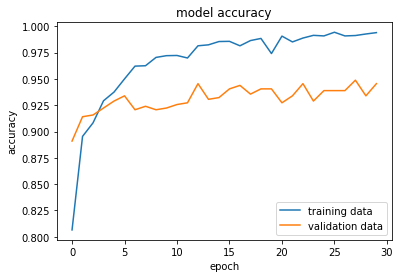

In [ ]:
plotting(history,"accuracy")

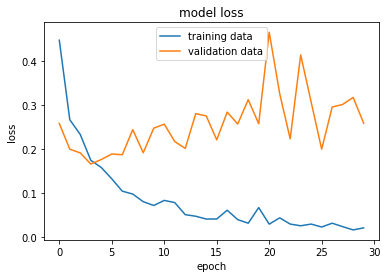

In [ ]:
plotting(history,"loss")

**Predictive System**

Path of the image to be predicted: /content/photo-1598207951491-255eaf139751.jpg


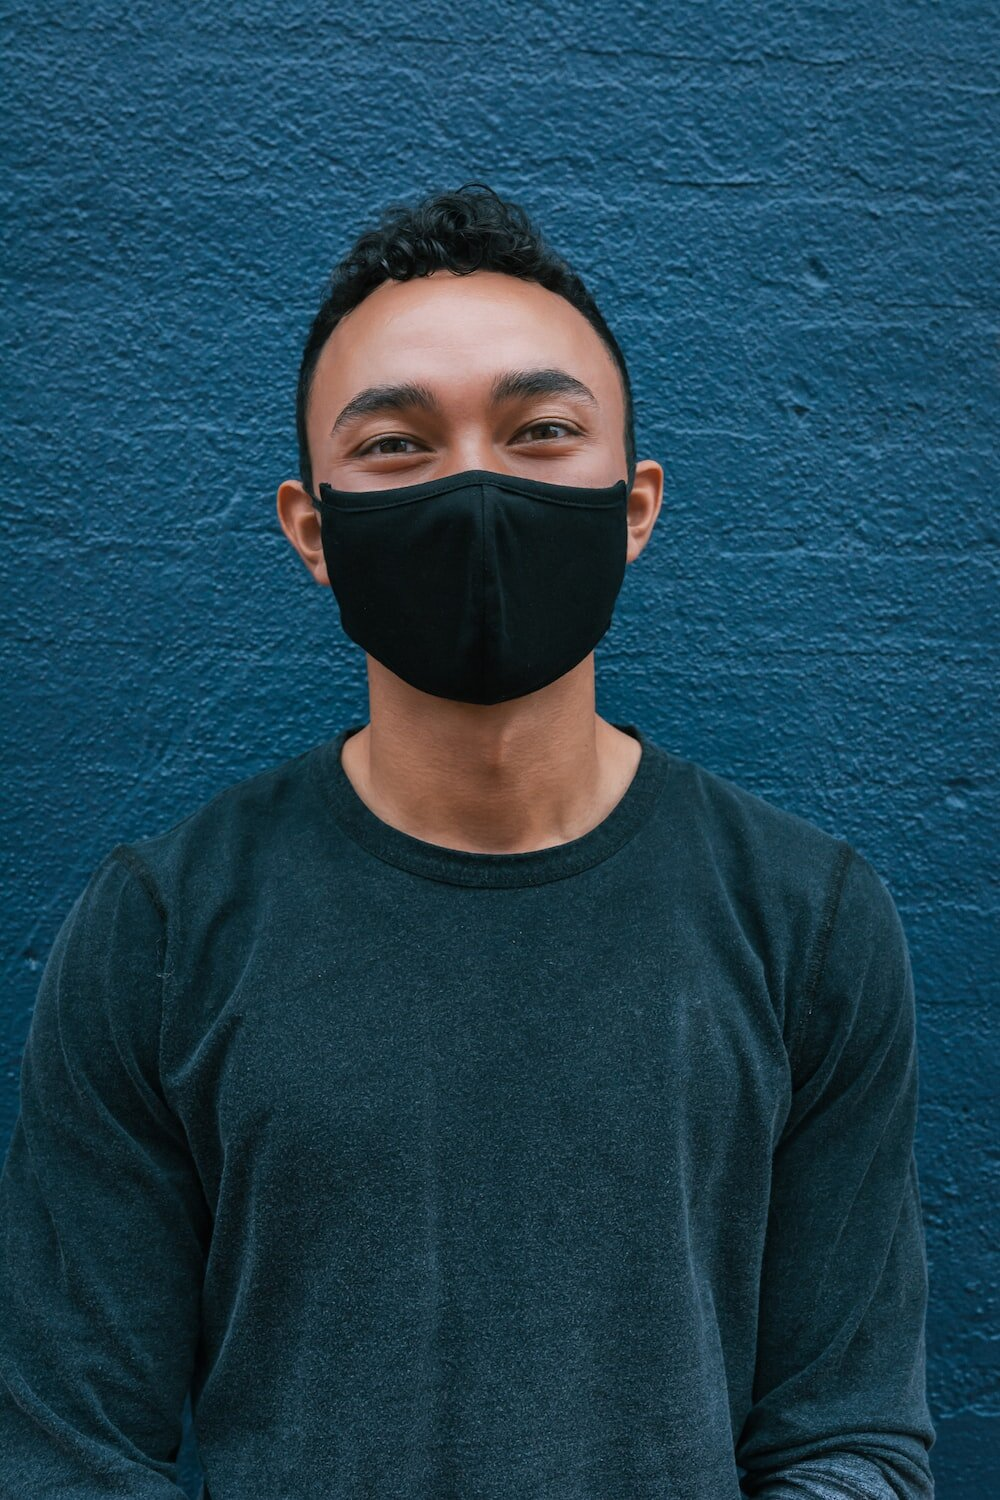

1/1 [==============================] - 0s 44ms/step
input_prediction :  [[0.99998224]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print("input_prediction : ",input_prediction)


input_pred_label = np.where(input_prediction[0][0]>0.5,1,0)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/financially-independent.jpg


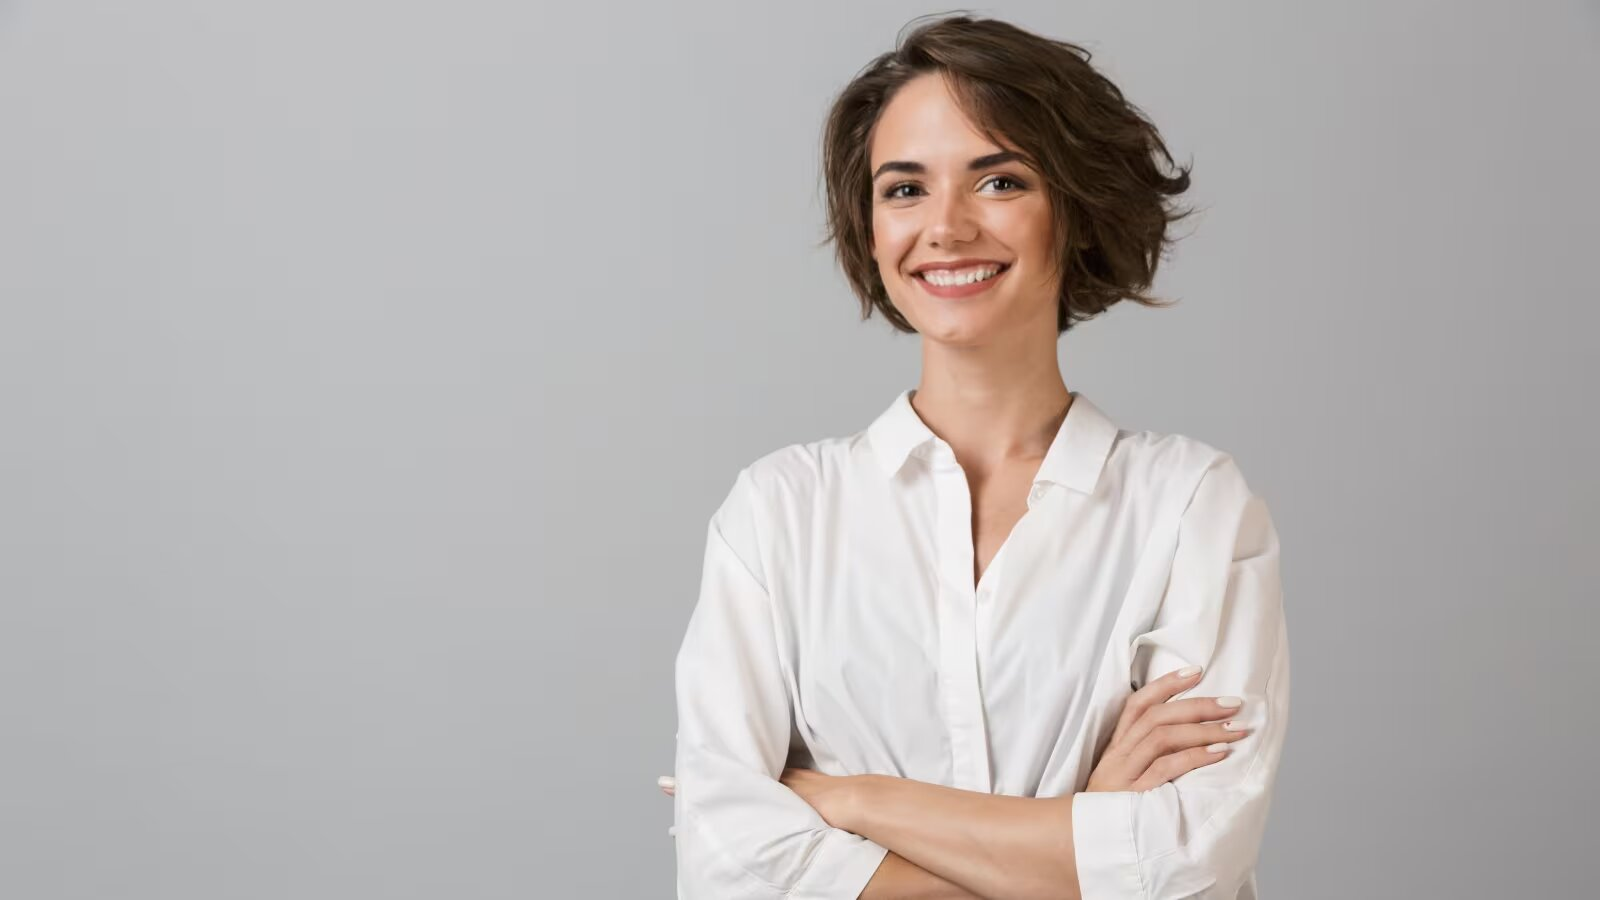

1/1 [==============================] - 0s 37ms/step
input_prediction :  [[0.45380226]]
input_pred_labels : 0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print("input_prediction : ",input_prediction)


input_pred_label = np.where(input_prediction[0][0]>0.5,1,0)

print("input_pred_labels :",input_pred_label)



if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')